In [1]:
import mne
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
#This import is only for making bigger plots. It can be removed.
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12, 6]

In [3]:
import QuickPreprocessingMNE as qmne

In [4]:
path = './data/Feb-15-Borja-ojos-cerrados-Activity-No-Labels-BBT-E16-AAA005-2020-02-15_12-59-21/EEG.csv'
channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz']

raw_borja = qmne.Bitbrain_to_raw(path, channels, 256)

Creating RawArray with float64 data, n_channels=16, n_times=31328
    Range : 0 ... 31327 =      0.000 ...   122.371 secs
Ready.
DigMontage is a superset of info. 78 in DigMontage will be ignored. The ignored channels are: {'Fpz', 'PO5', 'T8', 'T9', 'AF2', 'T4', 'M1', 'AF7', 'FCz', 'F7', 'P9', 'F5', 'FT9', 'PO8', 'T6', 'AF8', 'FC5', 'F8', 'TP9', 'Iz', 'CP6', 'P3', 'T3', 'P4', 'AF5', 'PO10', 'P6', 'F1', 'PO9', 'CP5', 'P7', 'TP10', 'FC6', 'P8', 'T5', 'A1', 'PO1', 'Fz', 'FC4', 'FT8', 'P5', 'F2', 'POz', 'C5', 'AF9', 'T10', 'FC1', 'F10', 'PO6', 'AFz', 'T7', 'F6', 'FT7', 'AF3', 'Oz', 'CPz', 'PO2', 'TP7', 'PO7', 'AF10', 'AF1', 'FT10', 'P1', 'PO4', 'C6', 'P10', 'AF4', 'M2', 'FC3', 'AF6', 'F9', 'PO3', 'P2', 'FC2', 'O10', 'TP8', 'O9', 'A2'}


Effective window size : 8.000 (s)


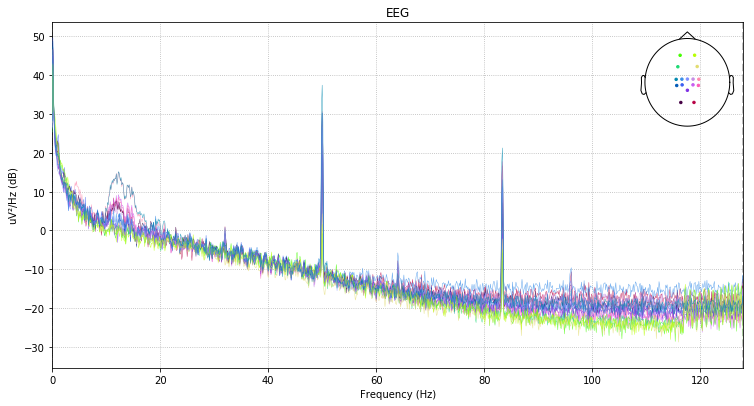

In [5]:
fig = raw_borja.plot_psd(fmin = 0, fmax = 200, average=False, tmin = 0, tmax = 120)

Effective window size : 8.000 (s)


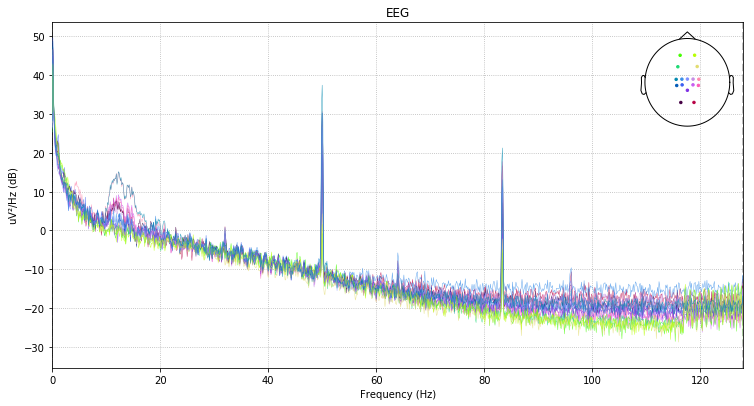

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 70 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 70.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


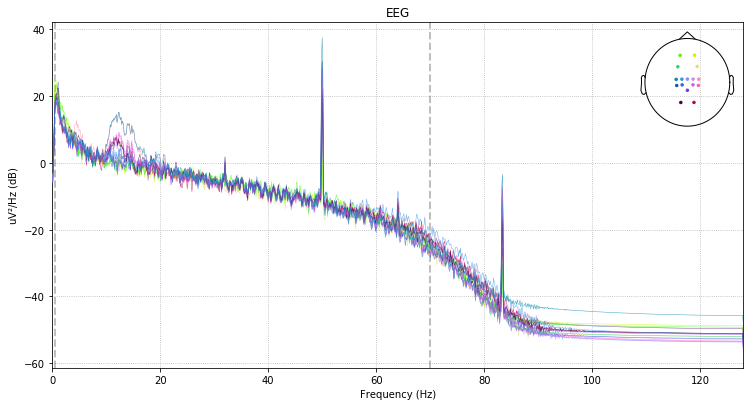

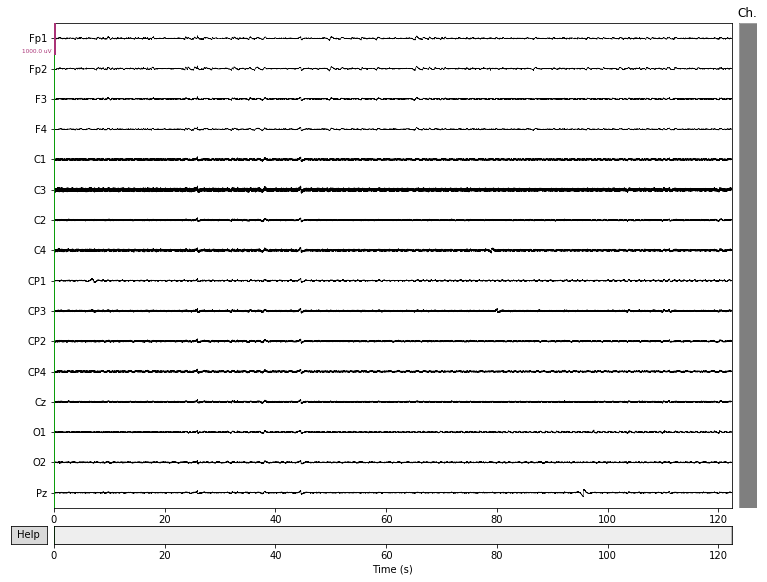

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Effective window size : 8.000 (s)


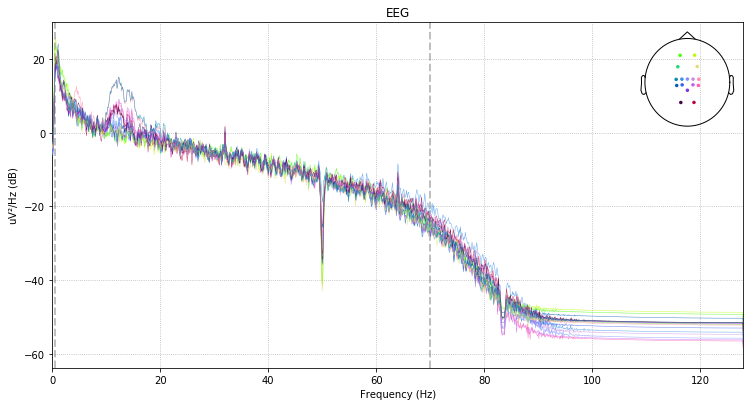

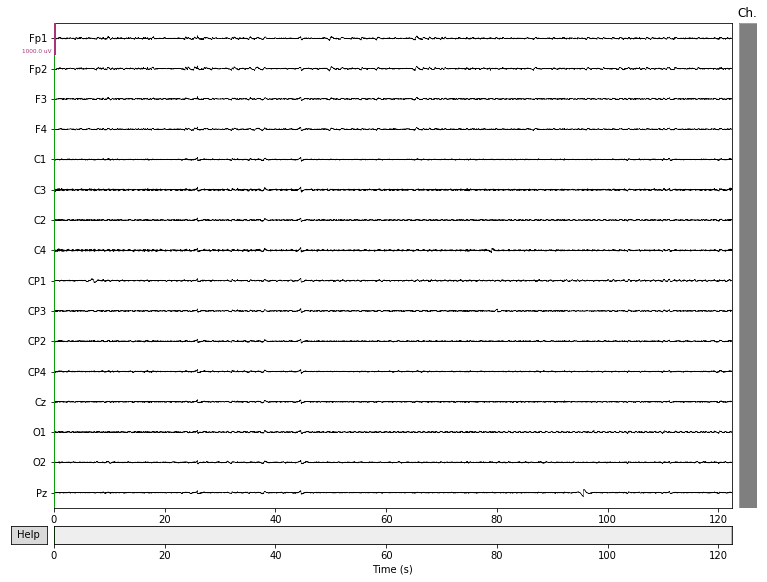

<RawArray  |  None, n_channels x n_times : 16 x 31328 (122.4 sec), ~3.9 MB, data loaded>

In [6]:
qmne.high_low_filter_notches(raw_borja, fmin = 0.5, fmax = 70, fnotch = (50, 83.5))

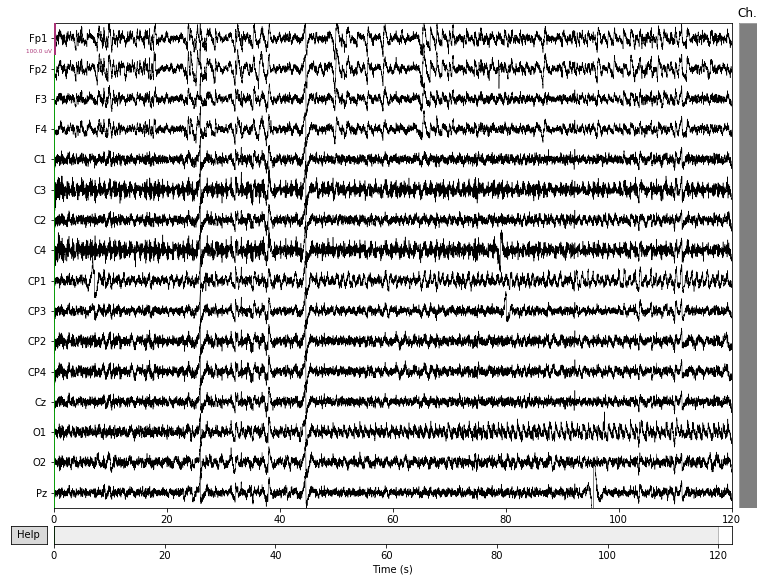

In [7]:
timeEEG = raw_borja.plot(start = 0., duration = 120., scalings=0.5e-4, remove_dc=True)

## Rereferencing

In [10]:
raw_borja.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


<RawArray  |  None, n_channels x n_times : 16 x 31328 (122.4 sec), ~3.9 MB, data loaded>

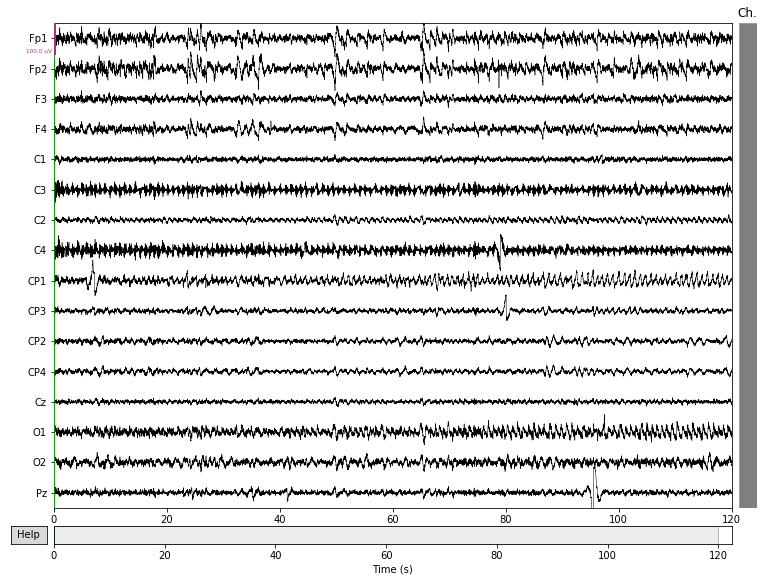

In [11]:
timeEEG = raw_borja.plot(start = 0., duration = 120., scalings=0.5e-4, remove_dc=True)

## ICA

In [12]:
from mne.preprocessing import ICA

In [13]:
ica = ICA(n_components=15, random_state=97, max_pca_components=16)
ica.fit(raw_borja)

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selection by number: 15 components
Fitting ICA took 6.8s.


<ICA  |  raw data decomposition, fit (fastica): 31328 samples, 15 components, channels used: "eeg">

Transforming to ICA space (15 components)
Zeroing out 1 ICA components
Transforming to ICA space (15 components)
Zeroing out 1 ICA components


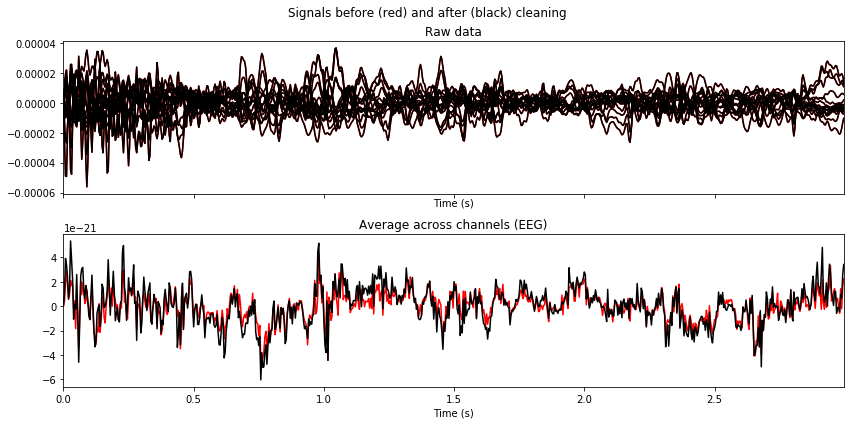

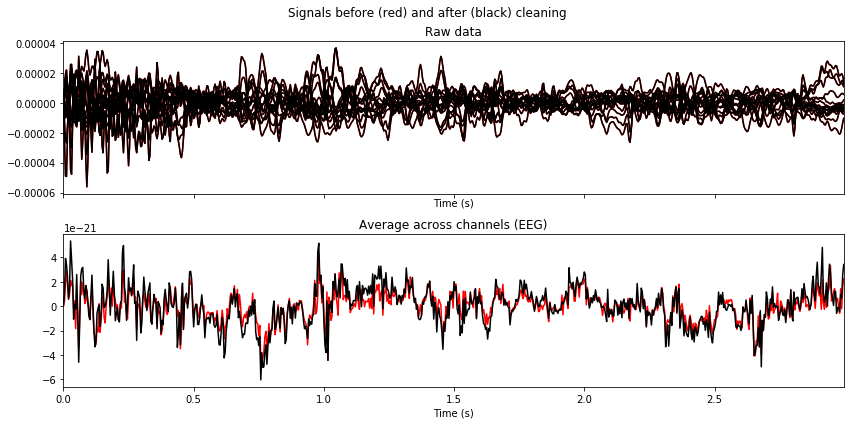

In [14]:
ica.exclude = [7]
reconst_raw = raw_borja.copy()
ica.apply(reconst_raw)
ica.plot_overlay(reconst_raw)

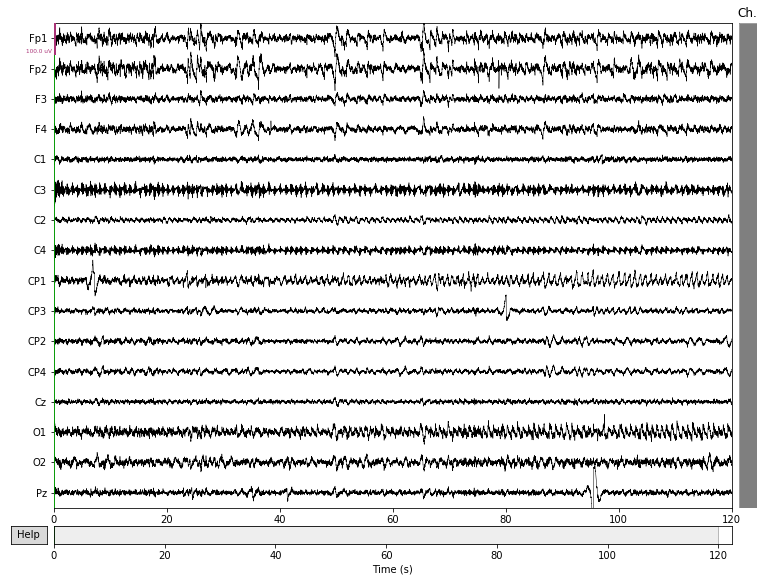

In [15]:
timeEEG = reconst_raw.plot(start = 0., duration = 120., scalings=0.5e-4, remove_dc=True)

## Frequency analysis

122 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 122 events and 180 original time points ...
1 bad epochs dropped


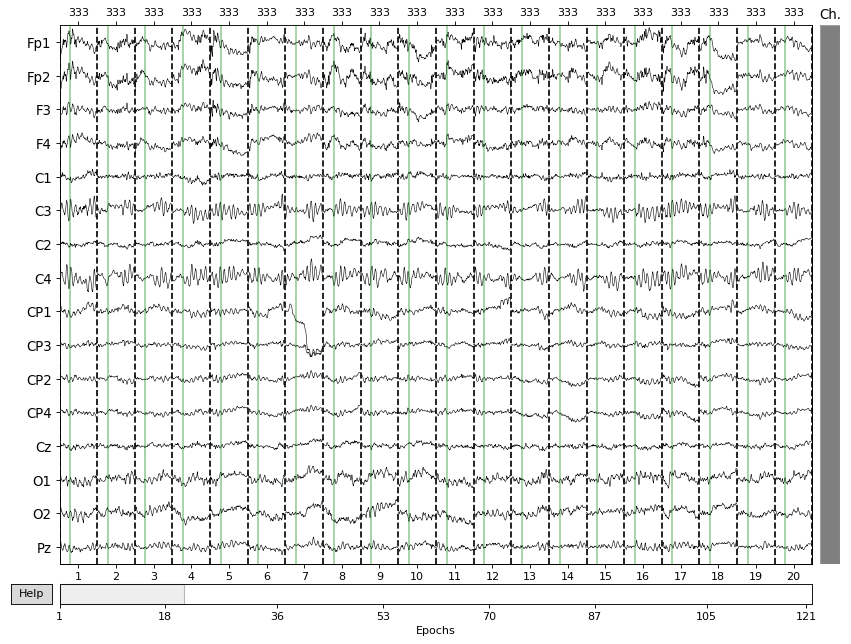

121 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


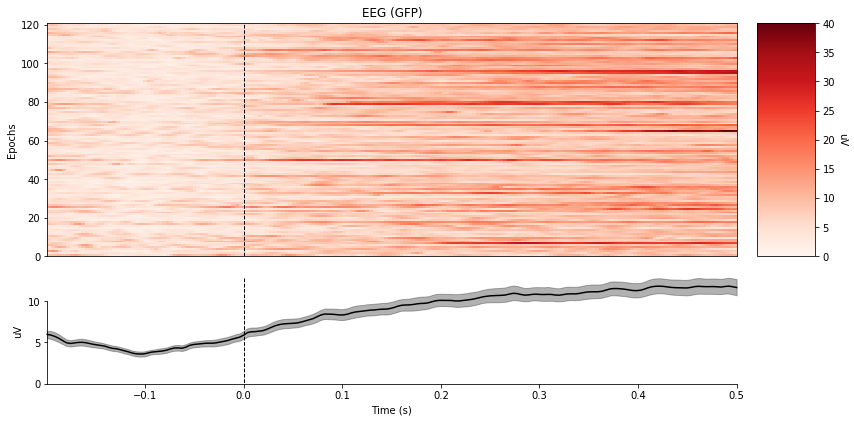

In [20]:
epochs = qmne.epochs_around_false_events(raw_borja)

In [40]:
alpha_raw = raw_borja.copy()
beta_raw = raw_borja.copy()
gamma_raw = raw_borja.copy()
theta_raw = raw_borja.copy()
delta_raw = raw_borja.copy()

In [43]:
alpha_raw.filter(l_freq=8, h_freq=12, l_trans_bandwidth=1, h_trans_bandwidth = 1)
beta_raw.filter(l_freq=12, h_freq=27, l_trans_bandwidth=1, h_trans_bandwidth = 1)
gamma_raw.filter(l_freq=27, h_freq=50, l_trans_bandwidth=1, h_trans_bandwidth = 1)
theta_raw.filter(l_freq=3, h_freq=8, l_trans_bandwidth=0.5, h_trans_bandwidth = 1)
delta_raw.filter(l_freq=0.2, h_freq=3, l_trans_bandwidth=0.1, h_trans_bandwidth = 1)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 845 samples (3.301 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 12 - 27 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 11.50 Hz)
- Upper passband edg

<RawArray  |  None, n_channels x n_times : 16 x 31328 (122.4 sec), ~3.9 MB, data loaded>

Effective window size : 8.000 (s)


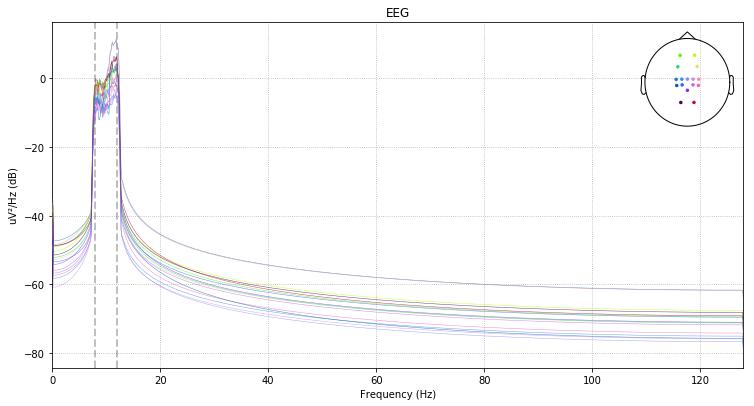

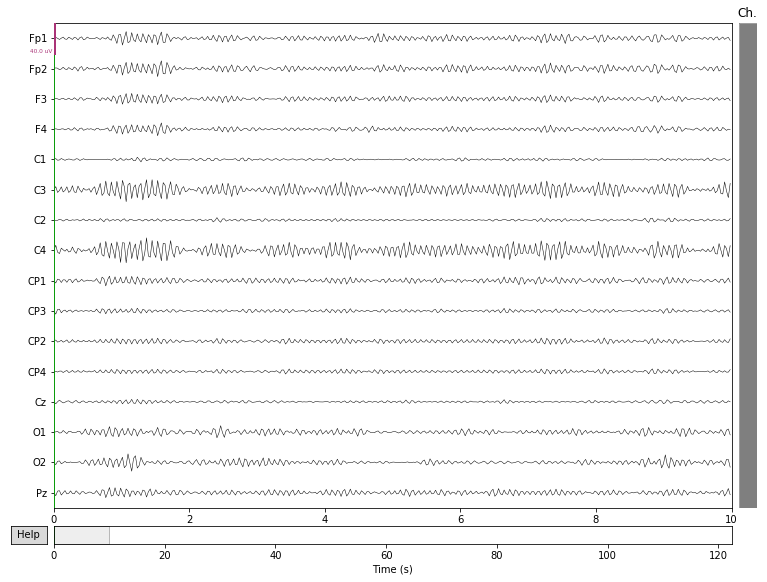

In [44]:
alpha_raw.plot_psd()
f = alpha_raw.plot()

Effective window size : 8.000 (s)


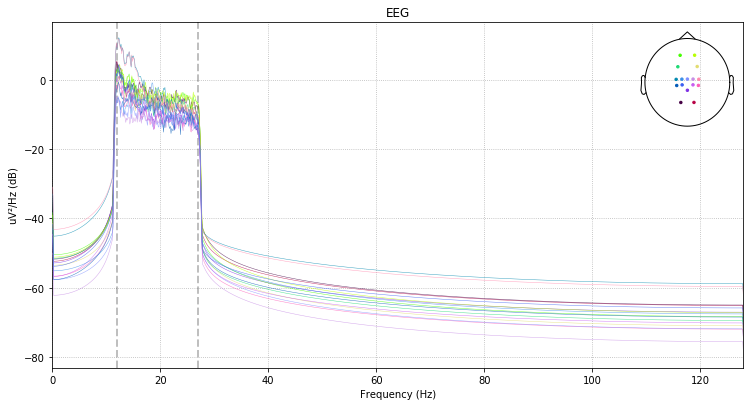

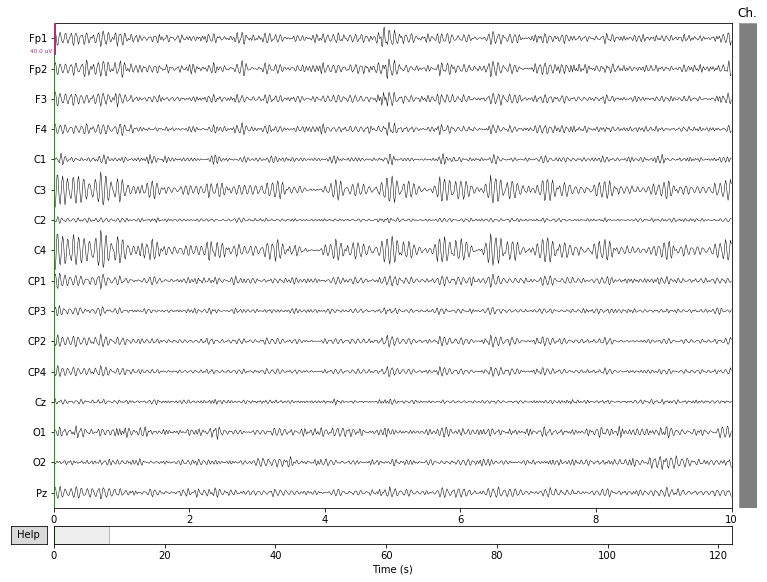

In [45]:
beta_raw.plot_psd()
f = beta_raw.plot()

Effective window size : 8.000 (s)


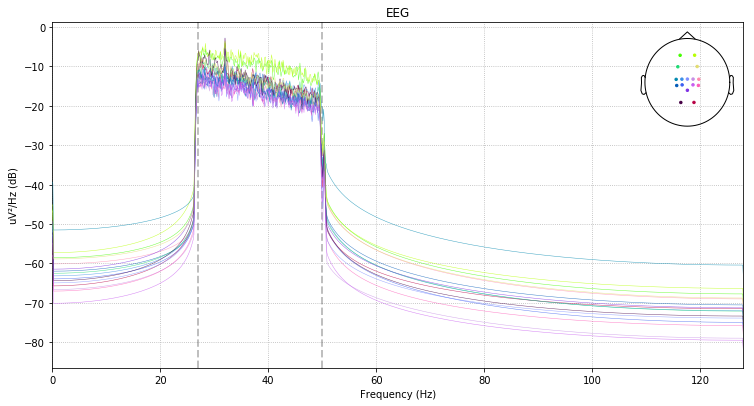

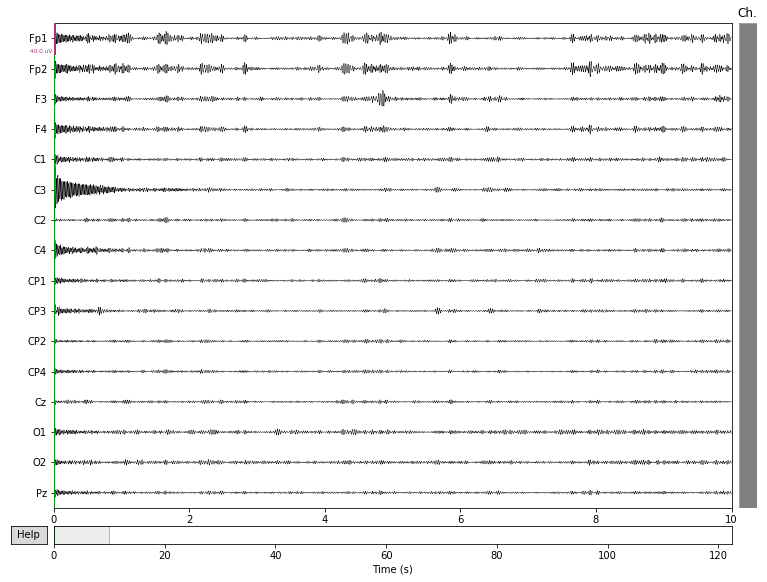

In [46]:
gamma_raw.plot_psd()
f = gamma_raw.plot()

Effective window size : 8.000 (s)


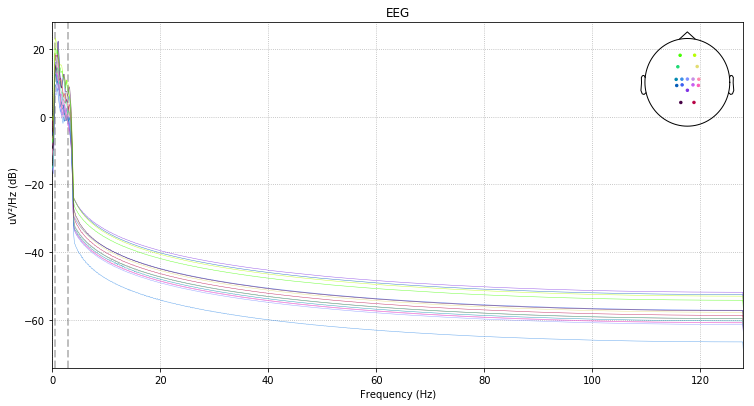

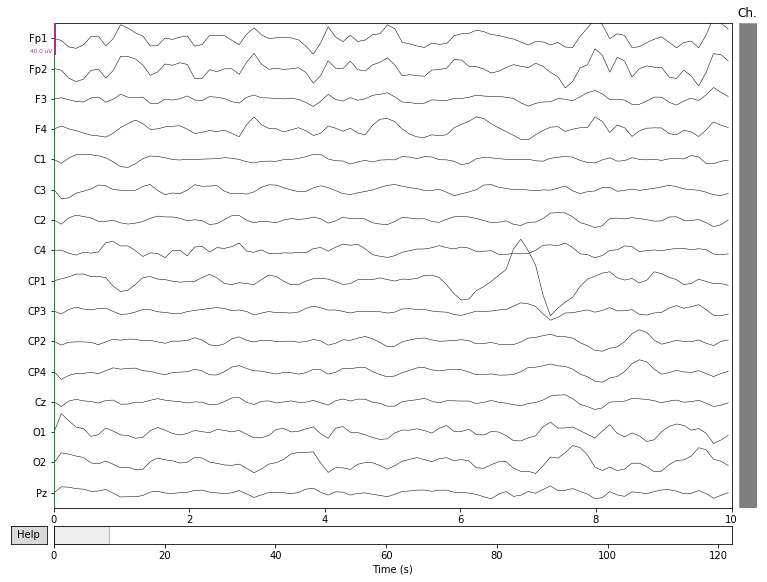

In [47]:
delta_raw.plot_psd()
f = delta_raw.plot()

Effective window size : 8.000 (s)


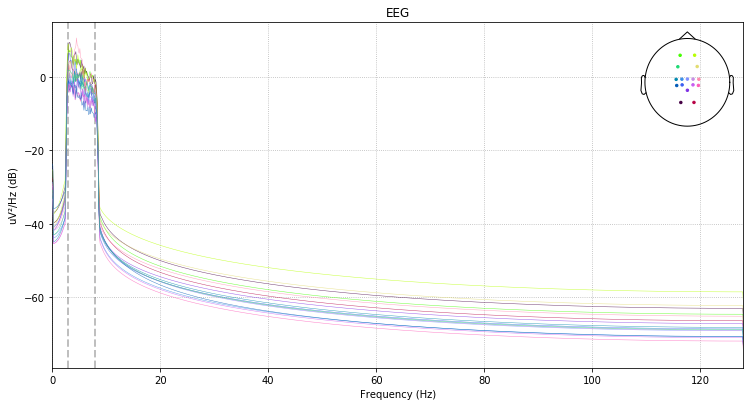

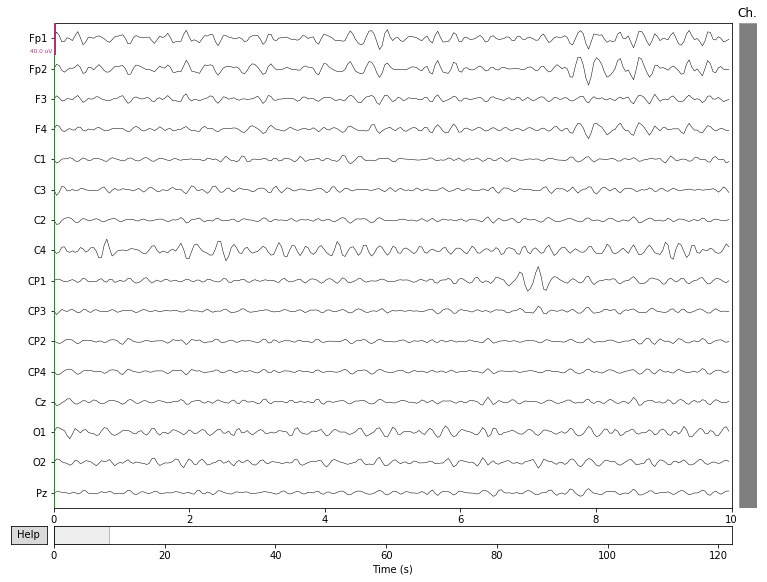

In [48]:
theta_raw.plot_psd()
f = theta_raw.plot()
